# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [2]:
# Replace None with your code
# Imports
import sqlite3
import pandas as pd 

# Create connection to database
conn = sqlite3.connect('data.sqlite')

In [3]:
table_check = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Available tables:")
print(table_check)

Available tables:
           name
0  orderdetails
1      payments
2       offices
3     customers
4        orders
5  productlines
6      products
7     employees


In [4]:
pd.read_sql("PRAGMA table_info(customers);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,customerNumber,,0,None,0
1,1,customerName,,0,None,0
2,2,contactLastName,,0,None,0
3,3,contactFirstName,,0,None,0
4,4,phone,,0,None,0
5,5,addressLine1,,0,None,0
6,6,addressLine2,,0,None,0
7,7,city,,0,None,0
8,8,state,,0,None,0
9,9,postalCode,,0,None,0


### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

In [13]:
# Replace None with your code
query = '''
SELECT customerName, state, CAST(creditLimit AS REAL) AS creditLimit
FROM customers
WHERE state = 'CA' AND CAST(creditLimit AS REAL) > 25000;
'''
ca_high_credit_customers = pd.read_sql(query, conn)
print(ca_high_credit_customers)

                   customerName state  creditLimit
0  Mini Gifts Distributors Ltd.    CA     210500.0
1               Mini Wheels Co.    CA      64600.0
2          Technics Stores Inc.    CA      84600.0
3             Toys4GrownUps.com    CA      90700.0
4  Collectable Mini Designs Co.    CA     105000.0
5      Corporate Gift Ideas Co.    CA     105000.0
6    Men 'R' US Retailers, Ltd.    CA      57700.0
7     The Sharp Gifts Warehouse    CA      77600.0
8   West Coast Collectables Co.    CA      55400.0
9      Signal Collectibles Ltd.    CA      60300.0


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [15]:
# Replace None with your code
query = '''
SELECT customerName, country
FROM customers
WHERE country != 'USA' AND customerName LIKE '%Collect%';
'''

collect_campaign_customers = pd.read_sql(query, conn)
print(collect_campaign_customers)


                          customerName      country
0           Australian Collectors, Co.    Australia
1              Clover Collections, Co.      Ireland
2                UK Collectables, Ltd.           UK
3          King Kong Collectables, Co.    Hong Kong
4                 Heintze Collectables      Denmark
5    Royal Canadian Collectables, Ltd.       Canada
6                    BG&E Collectables  Switzerland
7                   Reims Collectables       France
8                Precious Collectables  Switzerland
9                Salzburg Collectables      Austria
10             Tokyo Collectables, Ltd        Japan
11      Stuttgart Collectable Exchange      Germany
12  Bavarian Collectables Imports, Co.      Germany
13        Australian Collectables, Ltd    Australia
14           Kremlin Collectables, Co.       Russia


Reflection Question:
Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this?

I empathize with the non-technical manager, so here's my best explanation. The WHERE clause is used to make sure we’re only looking at international customers relevant to the campaign. It works like a filter that narrows down the data to only what we care about. Country != 'USA' ensures that we exclude all U.S.-based customers, so we're focused only on international partners. customerName LIKE '%Collect%' helps us find customers whose names include the word "Collect", which aligns with the campaign’s collector theme. These two conditions are joined with the AND operator, which means both must be true for a customer to be included in the results. That way, we’re only seeing international customers whose names reflect the campaign’s message.



### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

In [19]:
# Replace None with your code
query = '''
SELECT state, AVG(creditLimit) AS avg_credit_limit
FROM customers
WHERE country = 'USA'
GROUP BY state
ORDER BY avg_credit_limit DESC;
'''

state_avg_credit = pd.read_sql(query, conn)
print(state_avg_credit)

  state  avg_credit_limit
0    NH     114200.000000
1    NY      89966.666667
2    PA      84766.666667
3    CA      83854.545455
4    NV      71800.000000
5    MA      70755.555556
6    CT      57350.000000
7    NJ      43000.000000


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

<Axes: title={'center': 'Average Credit Limit by State'}, xlabel='State', ylabel='Average Credit Limit'>

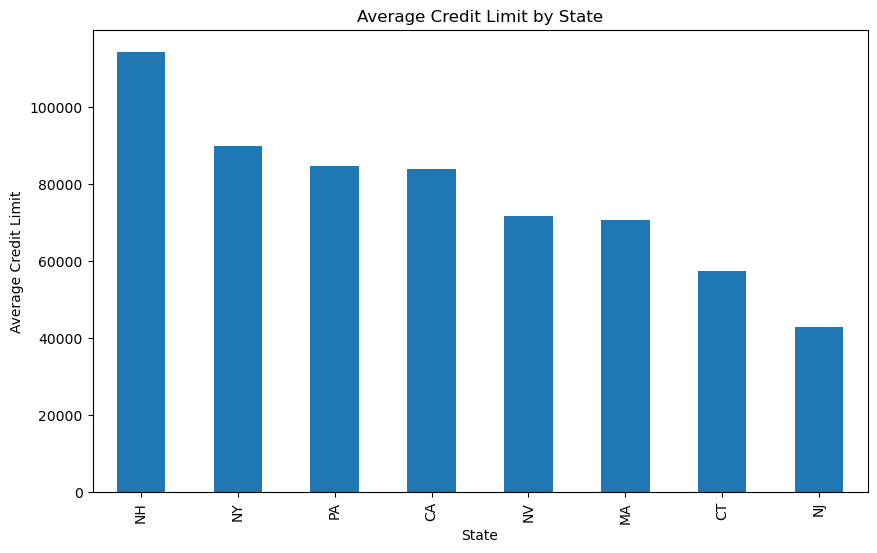

In [25]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
state_avg_credit.plot(
    kind='bar',
    x='state',
    y='avg_credit_limit',
    figsize=(10,6),
    title='Average Credit Limit by State',
    xlabel='State',
    ylabel='Average Credit Limit',
    legend=False
)

### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.


In [30]:
# Replace None with your code
query = '''
SELECT
    c.customerName
FROM payments p
JOIN customers c ON p.customerNumber = c.customerNumber
GROUP BY c.customerName
ORDER BY SUM(p.amount) DESC
LIMIT 10;
'''

top_customer_names = pd.read_sql(query, conn)
print(top_customer_names)

                   customerName
0        Euro+ Shopping Channel
1  Mini Gifts Distributors Ltd.
2    Australian Collectors, Co.
3            Muscle Machine Inc
4       Dragon Souveniers, Ltd.
5    Down Under Souveniers, Inc
6                AV Stores, Co.
7       Anna's Decorations, Ltd
8      Corporate Gift Ideas Co.
9        Saveley & Henriot, Co.


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

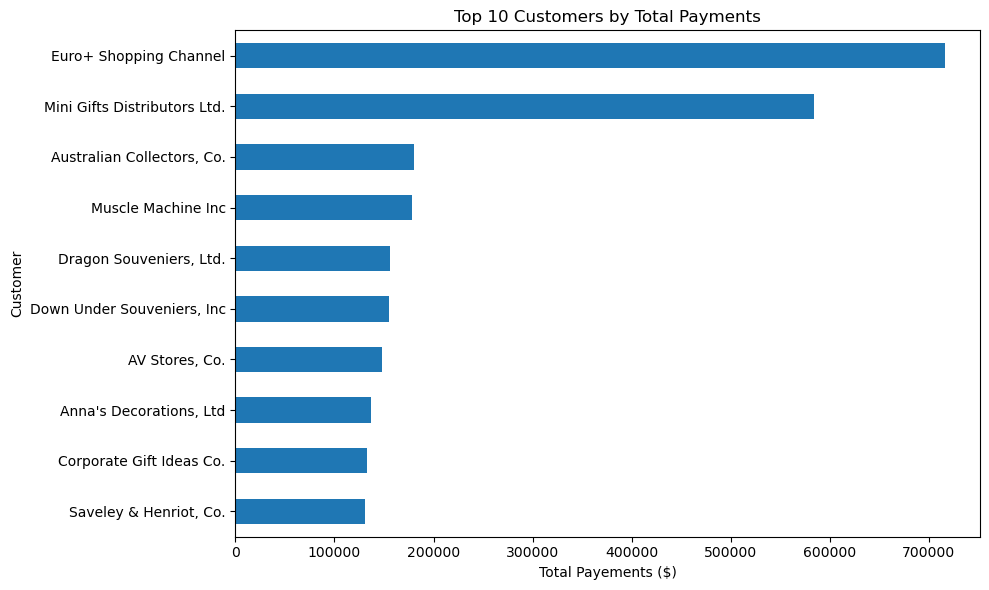

In [33]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments
import matplotlib.pyplot as plt

ax = top_customers.sort_values('total_payments').plot(
        kind='barh',
        x='customerName',
        y='total_payments',
        figsize=(10,6),
        legend=False,
        title='Top 10 Customers by Total Payments'
)
ax.set_xlabel('Total Payements ($)')
ax.set_ylabel('Customer')
plt.tight_layout()

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

In [39]:
# Replace None with you code
query = '''
SELECT
    c.customerName, 
    p.productName,
    SUM(od.quantityOrdered) AS total_quantity
FROM customers c
JOIN orders o ON c.customerNumber = o.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
JOIN products p ON od.productCode = p.productCode
GROUP BY c.customerName, p.productName
HAVING total_quantity >= 10
ORDER BY total_quantity ASC;
'''

pd.set_option('display.max_colwidth', 40)
pd.set_option('display.width', 120)

print(popular_products_per_customer.head(10))

                    customerName                       productName  total_quantity
0  Extreme Desk Decorations, Ltd             1961 Chevrolet Impala              10
1                     Petit Auto       1913 Ford Model T Speedster              10
2              La Rochelle Gifts       1954 Greyhound Scenicruiser              11
3        Tekni Collectables Inc.       American Airlines: B767-300              11
4      The Sharp Gifts Warehouse         1969 Chevrolet Camaro Z28              13
5            L'ordine Souveniers                    P-51-D Mustang              15
6          Salzburg Collectables           1982 Lamborghini Diablo              15
7      Souveniers And Things Co.  1936 Mercedes Benz 500k Roadster              15
8        Tokyo Collectables, Ltd  1936 Mercedes Benz 500k Roadster              15
9  Extreme Desk Decorations, Ltd              1969 Dodge Super Bee              16


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

In [41]:
# Replace None with your code
query = '''
SELECT
    p.productLine,
    COUNT(DISTINCT p.productCode) AS num_products,
    SUM(od.quantityOrdered) AS total_quantity_ordered
FROM products p
JOIN orderDetails od ON p.productCode = od.productCode
GROUP BY p.productLine
ORDER BY total_quantity_ordered DESC;
'''
product_line_summary = pd.read_sql(query, conn)
print(product_line_summary)

        productLine  num_products  total_quantity_ordered
0      Classic Cars            37                   35582
1      Vintage Cars            24                   22933
2       Motorcycles            13                   12778
3            Planes            12                   11872
4  Trucks and Buses            11                   11001
5             Ships             9                    8532
6            Trains             3                    2818


Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

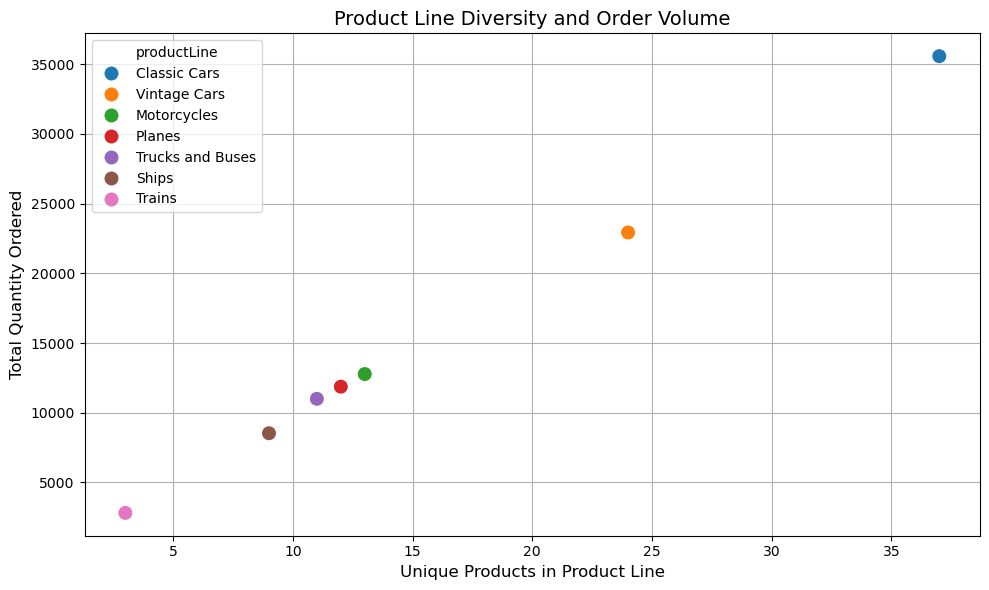

In [44]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=product_line_summary,
    x='num_products',
    y='total_quantity_ordered',
    hue='productLine',
    s=120
)

plt.title('Product Line Diversity and Order Volume', fontsize=14)
plt.xlabel('Unique Products in Product Line', fontsize=12)
plt.ylabel('Total Quantity Ordered', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Reflection Question:
Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

This scatter plot illustrates the relationship between the number of unique products in a product line and the total quantity ordered. There is clearly an upward trend, suggesting that product lines with more offerings tend to receive more total orders. However, additional analysis is needed to understand which specific products are driving sales within those lines. For example, Classic Cars and Vintage Cars stand out as high performers, but this may be due in part to the fact that they simply have more products available compared to lines like Trains. This highlights the need to dig deeper into product level performance, not just line level metrics. Additionally, seasonality could play a major role in customer demand, and floor space considerations may affect which product lines are prioritized in marketing and inventory planning. This plot provides a strong starting point for more granular, action-oriented analysis.



### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [63]:
# Replace None with your code
query = '''
SELECT
    e.employeeNumber,
    e.jobTitle,
    e.officeCode,
    o.city,
    o.country,
    CONCAT(m.firstName, ' ', m.lastName) AS managerName
    FROM employees e
    LEFT JOIN employees m ON e.reportsTo = m.employeeNumber
    JOIN offices o ON e.officeCode = o.officeCode
    WHERE e.officeCode IN (
        SELECT officeCode
        FROM employees
        GROUP BY officeCode
        HAVING COUNT(*) < 5
    )
    ORDER BY e.officeCode;
    '''
small_office_employees = pd.read_sql(query, conn)
print(small_office_employees)

   employeeNumber              jobTitle officeCode    city    country        managerName
0            1188             Sales Rep          2  Boston        USA        Anthony Bow
1            1216             Sales Rep          2  Boston        USA        Anthony Bow
2            1286             Sales Rep          3     NYC        USA        Anthony Bow
3            1323             Sales Rep          3     NYC        USA        Anthony Bow
4            1621             Sales Rep          5   Tokyo      Japan     Mary Patterson
5            1625             Sales Rep          5   Tokyo      Japan         Mami Nishi
6            1088  Sales Manager (APAC)          6  Sydney  Australia     Mary Patterson
7            1611             Sales Rep          6  Sydney  Australia  William Patterson
8            1612             Sales Rep          6  Sydney  Australia  William Patterson
9            1619             Sales Rep          6  Sydney  Australia  William Patterson
10           1501    

Reflection Question:
Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.
I used a subquery to isolate only those office codes that had fewer than 5 employees. This formed the foundation for filtering which employees would be included in the main query. The subquery groups all employees by their office code and filters those groups using HAVING. This allows us to dynamically identify small offices without hard coding specific values. In the main query, I used this subquery inside a WHERE ... IN clause to limit the employee records to just those working in the smaller offices. This structure ensures the main query remains scalable and accurate, adapting automatically to changes in office sizes without requiring manual updates. By using this approach, I was able to cleanly separate the logic for identifying relevant offices and use that result to retrieve detailed employee information, including job title, manager, and office location.
I also got curious about Mary Patterson and suspected she might be a corporate sales VP, but further investigation revealed a dead end. Her employee number appears to be a dangling reference in the dataset or maybe she retired. 


In [50]:
query = '''
SELECT
    e.employeeNumber,
    e.firstName,
    e.lastName,
    e.jobTitle,
    e.officeCode
FROM employees e
WHERE e.reportsTo = 1088;
'''

reporting_to_1088 = pd.read_sql(query, conn)
print(reporting_to_1088)

Empty DataFrame
Columns: [employeeNumber, firstName, lastName, jobTitle, officeCode]
Index: []


In [51]:
query = '''
SELECT
    employeeNumber,
    firstName,
    lastName,
    jobTitle,
    reportsTo,
    officeCode
FROM employees
WHERE employeeNumber = 1088;
'''
pd.read_sql(query, conn)

,employeeNumber,firstName,lastName,jobTitle,reportsTo,officeCode


### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [64]:
# Replace None with your code
conn.close()

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [66]:
# Run this cell without changes
import zipfile

zip_file_path = 'im.db.zip'
extract_to_path = './'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movi..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_i..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""mov..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id""..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

In [81]:
import zipfile
import sqlite3
import pandas as pd

zip_file_path = 'im.db.zip'
extract_to_path = './' 

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

conn = sqlite3.connect('im.db')

schema_df = pd.read_sql("""
    SELECT name FROM sqlite_master
    WHERE type='table';
""", conn)

schema_df

pd.read_sql("SELECT * FROM movie_basics LIMIT 5;", conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [67]:
# Begin your code here
pd.read_sql("SELECT * FROM movie_basics LIMIT 5;", conn4)
pd.read_sql("SELECT * FROM movie_ratings LIMIT 5;",conn4)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [75]:
pd.read_sql("PRAGMA table_info(movie_basics);", conn4)

,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,TEXT,0,None,0
1,1,primary_title,TEXT,0,None,0
2,2,original_title,TEXT,0,None,0
3,3,start_year,INTEGER,0,None,0
4,4,runtime_minutes,REAL,0,None,0
5,5,genres,TEXT,0,None,0


In [74]:
pd.read_sql("PRAGMA table_info(movie_ratings);", conn4)

,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,TEXT,0,None,0
1,1,averagerating,REAL,0,None,0
2,2,numvotes,INTEGER,0,None,0


In [77]:
query = '''
SELECT 
    mb.movie_id,
    mb.primary_title,
    mb.start_year,
    mb.runtime_minutes,
    mb.genres,
    mr.averagerating,
    mr.numvotes
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE mb.start_year Between 2010 and 2019
    AND mb.runtime_minutes IS NOT NULL
    AND mr.averagerating IS NOT NULL
    AND mr.numvotes IS NOT NULL
LIMIT 100;
'''

movie_data_sample = pd.read_sql(query, conn4)
print(movie_data_sample.head(20))


     movie_id                         primary_title  start_year  runtime_minutes                      genres  \
0   tt0063540                             Sunghursh        2013            175.0          Action,Crime,Drama   
1   tt0066787       One Day Before the Rainy Season        2019            114.0             Biography,Drama   
2   tt0069049            The Other Side of the Wind        2018            122.0                       Drama   
3   tt0100275              The Wandering Soap Opera        2017             80.0        Comedy,Drama,Fantasy   
4   tt0137204                       Joe Finds Grace        2017             83.0  Adventure,Animation,Comedy   
5   tt0146592                           Pál Adrienn        2010            136.0                       Drama   
6   tt0154039                  So Much for Justice!        2010            100.0                     History   
7   tt0159369    Cooper and Hemingway: The True Gen        2013            180.0                 Documen

In [83]:
# split multi- genre rows into separate rows

df_genres = movie_data_sample.assign(genres=movie_data_sample['genres'].str.split(',')).explode('genres')
df_genres['genres'] = df_genres['genres'].str.strip()



In [85]:
# Group by genre ratings and count

genre_stats = df_genres.groupby('genres').agg(
    avg_rating=('averagerating', 'mean'),
    movie_count=('genres', 'count'),
    avg_runtime=('runtime_minutes', 'mean')
).sort_values(by='avg_rating', ascending=False)

print(genre_stats)

             avg_rating  movie_count  avg_runtime
genres                                           
Documentary    7.812500            8    91.125000
Adventure      6.888235           17   104.529412
Family         6.700000            3   107.000000
Biography      6.680000            5   112.600000
Fantasy        6.620000            5   103.200000
Drama          6.352941           51   112.764706
History        6.300000            6   128.666667
Animation      6.288889            9    93.333333
Action         6.119048           21   116.904762
Sci-Fi         6.077778            9    99.555556
Comedy         6.077778           27    97.370370
Romance        6.044444            9   106.444444
Crime          5.881818           11   107.727273
Thriller       5.650000            8   108.625000
War            5.200000            2   157.500000
Horror         5.185714            7    96.857143
Mystery        4.975000            4   104.500000
Music          4.700000            1    84.000000


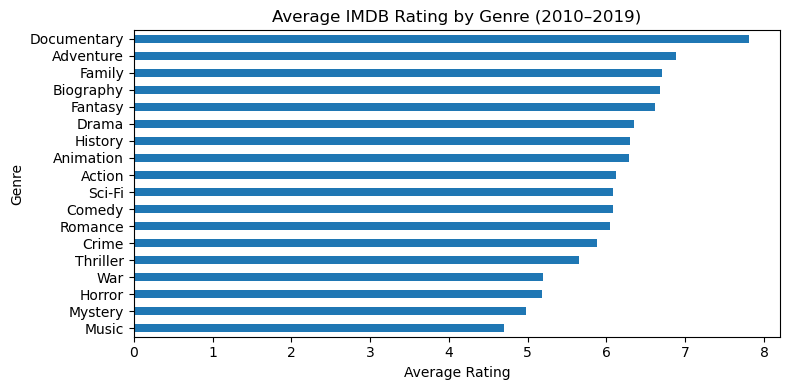

In [98]:
# Genre ratings plot and save
ax1 = genre_stats.sort_values('avg_rating', ascending=True).plot(
    y='avg_rating', kind='barh',
    title='Average IMDB Rating by Genre (2010–2019)',
    figsize=(8, 4), legend=False
)
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig("genre_ratings_chart.png", dpi=300, bbox_inches='tight')  
plt.show() 

In [88]:
#Use the same movie_data_sample DataFrame
df = movie_data_sample.copy()

#Create runtime categories
df['runtime_category'] = pd.cut(df['runtime_minutes'],
                                bins=[0, 90, 120, 150, float('inf')],
                                labels=['Short(<90)', 'Standard (90-120)', 'Long (120-150)', 'Epic(>150)'])


In [91]:
# Get runtime stats
runtime_stats = df.groupby('runtime_category', observed=True).agg(
    avg_rating=('averagerating', 'mean'),
    count=('runtime_category', 'count')
)

print(runtime_stats)

                   avg_rating  count
runtime_category                    
Short(<90)           6.580000     25
Standard (90-120)    5.992593     54
Long (120-150)       6.806250     16
Epic(>150)           6.860000      5


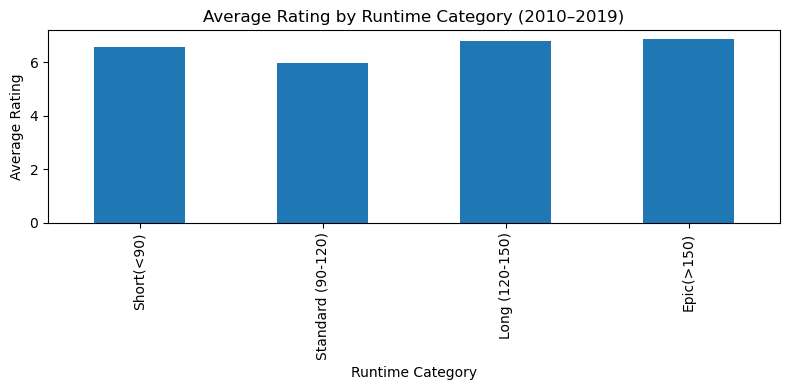

In [95]:
# Plot and save for Powerpoint 
ax2 = runtime_stats.plot(
    y='avg_rating', kind='bar',
    title='Average Rating by Runtime Category (2010–2019)',
    figsize=(8, 4), legend=False
)
plt.xlabel('Runtime Category')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.savefig("runtime_ratings_chart.png", dpi=300, bbox_inches='tight') 
plt.show()  

In [99]:
conn.close()

In [100]:
conn4.close()